# Solar heating model 3

The following cell shows the MATLAB/Octave code of the solar heating model after
- adding the pure water boiling point to the section in which the physical constants are set and
- inserting an `if` statement into the time loop that limits temperature to the boiling point.

You can run the resulting version 3 of the solar heating model by executing the following cell, or you can copy and paste the code to an M-file `solar_heating3.m` that you can run in GNU Octave.

In [1]:
% Set physical constants
pureWaterFreezingPoint  = 273.15;  % pure water freezing point/K
pureWaterBoilingPoint   = 373.15;  % pure water boiling point/K

% Set run parameters
deltaT     =    5.0*86400.0;       % time step/s
startTime  =    0.0;               % time to start integration/s
nTimeSteps =  365;                 % total number of time steps

% Set model parameters
solarConstant         = 1360.8;    % solar constant/(W m-2)
effectiveHeatCapacity = 2.9526E08; % effective heat capacity of the 
                                   % atmosphere-ocean system/(J m-2 K-1)
                                   
% Set initial conditions
temperature = 15.0 + pureWaterFreezingPoint;
myTime      = startTime;

% Open output file
fileID = fopen('results.txt', 'w');

% Write header of output file
fprintf(fileID, '%% Zero-dimensional global solar heating model\n');
fprintf(fileID, '%% Column 1: time/a\n');
fprintf(fileID, '%% Column 2: global annual-mean surface temperature/degC\n');
fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                   temperature - pureWaterFreezingPoint);
 
% Time loop (myIter = iteration counter)
for myIter=1:nTimeSteps
    
    % Record simulated time
    myTime = myTime + deltaT;
    
    % Step global annual-mean surface temperature forward in time 
    % (by "Euler forward" or "forward-in-time" method)
    temperature  = temperature + deltaT/effectiveHeatCapacity* ...
                                 (solarConstant/4.0);
                                 
    % Limit temperature to the boiling point
    if temperature > pureWaterBoilingPoint
        temperature = pureWaterBoilingPoint;
    end
    
    % Write current time and temperature to output file
    fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                       temperature - pureWaterFreezingPoint);
    
end % end of time loop

% Close output file
fclose(fileID);

To visualize the results in a plot, we can make use of the same code (or M-file script `plot_results.m`) as before. However, it is convenient to explicitly the y-axis to the range between 0 and 200 °C in order to clearly see that the temperature is clipped at the boiling point:

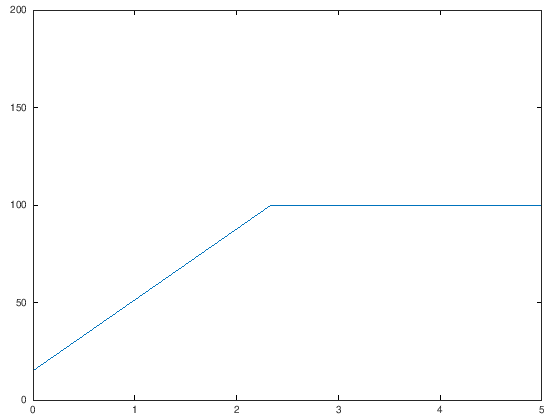

In [3]:
% Open text file and load data
filename    = 'results.txt';
data        = load(filename);
time        = data(:, 1); % column 1: time/a
temperature = data(:, 2); % column 2: temperature/degC

% Plot the global annual-mean surface temperature as a function of time
plot(time, temperature, 'LineWidth', 2);

% Limit the y-axis
ylim([0 200])

## Summary
1. You learned how to integrate ordinary differential equations using a straightforward method that has numerous applications in geosciences and beyond.
2. You also saw how to save variables from MATLAB/Octave to a text file and how to read them from a text file and plot them. Saving results to files and later retrieving them for analysis is a common work flow in Earth-system modeling.

## Next section
Now proceed with [Modular programming](octave_functions.ipynb).